# Regression with MLP


In [1]:
"""
Layer is defined as matrix of weights n*m, each line represents a node
The number of colums represent the number of inputs from previou layer.
For instance, if the data consists of observations of 5 variables 
or features. the first layer will conists of 5 nodes.

"""

import numpy as np

class layer:
    def __init__(self, activ, n_nodes, n_inputs):
        self.n_nodes  = n_nodes
        self.n_inputs = n_inputs
        self.activ    = activ
        self.acfunc, self.deriv_out = self.__generate_funcs() 
        self.w = 2*np.random.random([n_nodes, n_inputs])-1
        if not activ in ['linear','sigmoid','tanh']:
            print("Allowed activation function : linear,sigmoid,tanh")                                       
    
    def feed(self,x):
        return  self.acfunc(np.dot(self.w,x.reshape(-1,1)))
    
    def feedData(self,X):
        d = np.dot(X,self.w.T)
        return self.acfunc(d)
    
    def __generate_funcs(self):
        if self.activ=='linear':
            def tmp(x):return x   
            def tmp1p(y):return 1.0       
        elif self.activ=='sigmoid':
            def tmp(x): return 1.0/(1.0+np.exp(-x))
            def tmp1p(y): return y*(1-y)                        
        elif self.activ=='tanh':
            def tmp(x): return np.tanh(x)
            def tmp1p(y): return (1-y*y)            
        else: pass
        return tmp, tmp1p     


## Fitting a sine with gaussian noise 
- generate the data

In [2]:
X   = np.linspace(-5,5,500).reshape(-1,1)
n,m = X.shape
ytrue = np.sin(X) 

Y = ytrue + 0.4*np.random.randn(n,m)
          
# train/validation is 50/50
n_te = int(n*0.5) 

import random   

te_ind = random.sample(list(range(n)),n_te)
tr_ind = list(set(list(range(n)))-set(te_ind))

Xte, Yte = X[te_ind,:], Y[te_ind]
Xtr, Ytr = X[tr_ind,:], Y[tr_ind]

In [3]:
np.random.seed(197) # making sure results are reproducible
in_dim = Xte.shape[1]

# defining the MLP : one hidden layer of 10 nodes
n_nodes = 10    
# tanh is the activation function for both layers
L1      = layer('tanh',n_nodes ,in_dim) 
L2      = layer('tanh',1 ,n_nodes)

# the score function for the network
def score(x):
    o1 = L1.feedData(x)
    o2 = L2.feedData(o1)    
    return o2

## training the network


In [4]:
eta = 0.001
iters, sErr = 2000, np.Infinity
for i in range(iters):   
    for obs in range(Xtr.shape[0]):
        o0 , y = Xtr[obs,:], float(Ytr[obs])
        o1 = L1.feed(o0)
        o2 = float(L2.feed(o1))
 
        dCost_do2 = 2*(o2-y)
        
        delta2 = dCost_do2*L2.deriv_out(o2)
        L2.w  += -eta*delta2*o1.reshape(1,-1)
            
        delta1 = delta2*L1.deriv_out(o1)    
        L1.w += -eta*delta1*o0    
    
    resid = Yte - score(Xte)
    valid_err = float(sum(resid**2)/len(resid))    
    sErr0     = sErr    
    sErr      = valid_err    
    if sErr>sErr0: #(sErr-sErr0)/sErr0>1e-6: 
       break    
    print("epoch  ",i," Validation error =", round(valid_err,4) )

epoch   0  Validation error = 0.8917
epoch   1  Validation error = 0.8094
epoch   2  Validation error = 0.7787
epoch   3  Validation error = 0.7564
epoch   4  Validation error = 0.7375
epoch   5  Validation error = 0.7207
epoch   6  Validation error = 0.7054
epoch   7  Validation error = 0.6913
epoch   8  Validation error = 0.678
epoch   9  Validation error = 0.6654
epoch   10  Validation error = 0.6535
epoch   11  Validation error = 0.6421
epoch   12  Validation error = 0.6312
epoch   13  Validation error = 0.6207
epoch   14  Validation error = 0.6106
epoch   15  Validation error = 0.6009
epoch   16  Validation error = 0.5916
epoch   17  Validation error = 0.5827
epoch   18  Validation error = 0.5741
epoch   19  Validation error = 0.5657
epoch   20  Validation error = 0.5577
epoch   21  Validation error = 0.55
epoch   22  Validation error = 0.5426
epoch   23  Validation error = 0.5355
epoch   24  Validation error = 0.5285
epoch   25  Validation error = 0.5219
epoch   26  Validation er

epoch   240  Validation error = 0.2581
epoch   241  Validation error = 0.2579
epoch   242  Validation error = 0.2576
epoch   243  Validation error = 0.2574
epoch   244  Validation error = 0.2572
epoch   245  Validation error = 0.2569
epoch   246  Validation error = 0.2567
epoch   247  Validation error = 0.2565
epoch   248  Validation error = 0.2562
epoch   249  Validation error = 0.256
epoch   250  Validation error = 0.2558
epoch   251  Validation error = 0.2555
epoch   252  Validation error = 0.2553
epoch   253  Validation error = 0.2551
epoch   254  Validation error = 0.2549
epoch   255  Validation error = 0.2546
epoch   256  Validation error = 0.2544
epoch   257  Validation error = 0.2542
epoch   258  Validation error = 0.254
epoch   259  Validation error = 0.2538
epoch   260  Validation error = 0.2535
epoch   261  Validation error = 0.2533
epoch   262  Validation error = 0.2531
epoch   263  Validation error = 0.2529
epoch   264  Validation error = 0.2527
epoch   265  Validation err

epoch   510  Validation error = 0.2219
epoch   511  Validation error = 0.2218
epoch   512  Validation error = 0.2217
epoch   513  Validation error = 0.2217
epoch   514  Validation error = 0.2216
epoch   515  Validation error = 0.2215
epoch   516  Validation error = 0.2214
epoch   517  Validation error = 0.2214
epoch   518  Validation error = 0.2213
epoch   519  Validation error = 0.2212
epoch   520  Validation error = 0.2211
epoch   521  Validation error = 0.2211
epoch   522  Validation error = 0.221
epoch   523  Validation error = 0.2209
epoch   524  Validation error = 0.2208
epoch   525  Validation error = 0.2208
epoch   526  Validation error = 0.2207
epoch   527  Validation error = 0.2206
epoch   528  Validation error = 0.2206
epoch   529  Validation error = 0.2205
epoch   530  Validation error = 0.2204
epoch   531  Validation error = 0.2203
epoch   532  Validation error = 0.2203
epoch   533  Validation error = 0.2202
epoch   534  Validation error = 0.2201
epoch   535  Validation er

epoch   739  Validation error = 0.2091
epoch   740  Validation error = 0.209
epoch   741  Validation error = 0.209
epoch   742  Validation error = 0.209
epoch   743  Validation error = 0.2089
epoch   744  Validation error = 0.2089
epoch   745  Validation error = 0.2088
epoch   746  Validation error = 0.2088
epoch   747  Validation error = 0.2088
epoch   748  Validation error = 0.2087
epoch   749  Validation error = 0.2087
epoch   750  Validation error = 0.2086
epoch   751  Validation error = 0.2086
epoch   752  Validation error = 0.2086
epoch   753  Validation error = 0.2085
epoch   754  Validation error = 0.2085
epoch   755  Validation error = 0.2084
epoch   756  Validation error = 0.2084
epoch   757  Validation error = 0.2084
epoch   758  Validation error = 0.2083
epoch   759  Validation error = 0.2083
epoch   760  Validation error = 0.2083
epoch   761  Validation error = 0.2082
epoch   762  Validation error = 0.2082
epoch   763  Validation error = 0.2081
epoch   764  Validation erro

epoch   1026  Validation error = 0.2003
epoch   1027  Validation error = 0.2003
epoch   1028  Validation error = 0.2003
epoch   1029  Validation error = 0.2003
epoch   1030  Validation error = 0.2003
epoch   1031  Validation error = 0.2002
epoch   1032  Validation error = 0.2002
epoch   1033  Validation error = 0.2002
epoch   1034  Validation error = 0.2002
epoch   1035  Validation error = 0.2001
epoch   1036  Validation error = 0.2001
epoch   1037  Validation error = 0.2001
epoch   1038  Validation error = 0.2001
epoch   1039  Validation error = 0.2001
epoch   1040  Validation error = 0.2
epoch   1041  Validation error = 0.2
epoch   1042  Validation error = 0.2
epoch   1043  Validation error = 0.2
epoch   1044  Validation error = 0.1999
epoch   1045  Validation error = 0.1999
epoch   1046  Validation error = 0.1999
epoch   1047  Validation error = 0.1999
epoch   1048  Validation error = 0.1999
epoch   1049  Validation error = 0.1998
epoch   1050  Validation error = 0.1998
epoch   1051

epoch   1247  Validation error = 0.1961
epoch   1248  Validation error = 0.1961
epoch   1249  Validation error = 0.1961
epoch   1250  Validation error = 0.1961
epoch   1251  Validation error = 0.196
epoch   1252  Validation error = 0.196
epoch   1253  Validation error = 0.196
epoch   1254  Validation error = 0.196
epoch   1255  Validation error = 0.196
epoch   1256  Validation error = 0.196
epoch   1257  Validation error = 0.1959
epoch   1258  Validation error = 0.1959
epoch   1259  Validation error = 0.1959
epoch   1260  Validation error = 0.1959
epoch   1261  Validation error = 0.1959
epoch   1262  Validation error = 0.1959
epoch   1263  Validation error = 0.1959
epoch   1264  Validation error = 0.1958
epoch   1265  Validation error = 0.1958
epoch   1266  Validation error = 0.1958
epoch   1267  Validation error = 0.1958
epoch   1268  Validation error = 0.1958
epoch   1269  Validation error = 0.1958
epoch   1270  Validation error = 0.1957
epoch   1271  Validation error = 0.1957
epoch 

epoch   1519  Validation error = 0.1924
epoch   1520  Validation error = 0.1924
epoch   1521  Validation error = 0.1924
epoch   1522  Validation error = 0.1924
epoch   1523  Validation error = 0.1924
epoch   1524  Validation error = 0.1924
epoch   1525  Validation error = 0.1924
epoch   1526  Validation error = 0.1924
epoch   1527  Validation error = 0.1923
epoch   1528  Validation error = 0.1923
epoch   1529  Validation error = 0.1923
epoch   1530  Validation error = 0.1923
epoch   1531  Validation error = 0.1923
epoch   1532  Validation error = 0.1923
epoch   1533  Validation error = 0.1923
epoch   1534  Validation error = 0.1923
epoch   1535  Validation error = 0.1923
epoch   1536  Validation error = 0.1922
epoch   1537  Validation error = 0.1922
epoch   1538  Validation error = 0.1922
epoch   1539  Validation error = 0.1922
epoch   1540  Validation error = 0.1922
epoch   1541  Validation error = 0.1922
epoch   1542  Validation error = 0.1922
epoch   1543  Validation error = 0.1922


epoch   1740  Validation error = 0.1902
epoch   1741  Validation error = 0.1902
epoch   1742  Validation error = 0.1902
epoch   1743  Validation error = 0.1902
epoch   1744  Validation error = 0.1902
epoch   1745  Validation error = 0.1902
epoch   1746  Validation error = 0.1902
epoch   1747  Validation error = 0.1902
epoch   1748  Validation error = 0.1901
epoch   1749  Validation error = 0.1901
epoch   1750  Validation error = 0.1901
epoch   1751  Validation error = 0.1901
epoch   1752  Validation error = 0.1901
epoch   1753  Validation error = 0.1901
epoch   1754  Validation error = 0.1901
epoch   1755  Validation error = 0.1901
epoch   1756  Validation error = 0.1901
epoch   1757  Validation error = 0.1901
epoch   1758  Validation error = 0.1901
epoch   1759  Validation error = 0.19
epoch   1760  Validation error = 0.19
epoch   1761  Validation error = 0.19
epoch   1762  Validation error = 0.19
epoch   1763  Validation error = 0.19
epoch   1764  Validation error = 0.19
epoch   1765

epoch   1993  Validation error = 0.1882
epoch   1994  Validation error = 0.1882
epoch   1995  Validation error = 0.1882
epoch   1996  Validation error = 0.1882
epoch   1997  Validation error = 0.1882
epoch   1998  Validation error = 0.1882
epoch   1999  Validation error = 0.1882


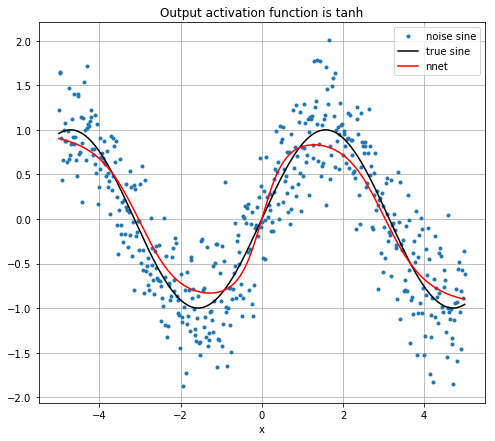

In [7]:
import  matplotlib.pyplot as plt

pred  = score(X) 
plt.figure(figsize=(8,7))
plt.plot(X,Y,'.', label='noise sine')
plt.plot(X,ytrue,'-k', label='true sine')
plt.plot(X,pred,'-r', label='nnet')
plt.grid()
plt.xlabel('x')
plt.legend(loc='upper right')  
plt.title('Output activation function is tanh')
plt.show()

In [5]:
# defining the MLP : one hidden layer of 10 nodes
n_nodes = 10    
# linear is the activation function for output layer
L1      = layer('tanh',n_nodes ,in_dim) 
L2      = layer('linear',1 ,n_nodes)

eta = 0.001
iters, sErr = 2000, np.Infinity
for i in range(iters):   
    for obs in range(Xtr.shape[0]):
        o0 , y = Xtr[obs,:], float(Ytr[obs])
        o1 = L1.feed(o0)
        o2 = float(L2.feed(o1))
 
        dCost_do2 = 2*(o2-y)
        
        delta2 = dCost_do2*L2.deriv_out(o2)
        L2.w  += -eta*delta2*o1.reshape(1,-1)
            
        delta1 = delta2*L1.deriv_out(o1)    
        L1.w += -eta*delta1*o0    
    
    resid = Yte - score(Xte)
    valid_err = float(sum(resid**2)/len(resid))    
    sErr0     = sErr    
    sErr      = valid_err    
    if sErr>sErr0: #(sErr-sErr0)/sErr0>1e-6: 
       break    
    print("epoch  ",i," Validation error =", round(valid_err,4) )

epoch   0  Validation error = 0.9556
epoch   1  Validation error = 0.8916
epoch   2  Validation error = 0.8428
epoch   3  Validation error = 0.8012
epoch   4  Validation error = 0.7575
epoch   5  Validation error = 0.7116
epoch   6  Validation error = 0.6679
epoch   7  Validation error = 0.6277
epoch   8  Validation error = 0.5917
epoch   9  Validation error = 0.5618
epoch   10  Validation error = 0.5383
epoch   11  Validation error = 0.5191
epoch   12  Validation error = 0.5026
epoch   13  Validation error = 0.4879
epoch   14  Validation error = 0.4745
epoch   15  Validation error = 0.4621
epoch   16  Validation error = 0.4507
epoch   17  Validation error = 0.4402
epoch   18  Validation error = 0.4305
epoch   19  Validation error = 0.4215
epoch   20  Validation error = 0.4132
epoch   21  Validation error = 0.4055
epoch   22  Validation error = 0.3983
epoch   23  Validation error = 0.3917
epoch   24  Validation error = 0.3855
epoch   25  Validation error = 0.3798
epoch   26  Validation

epoch   362  Validation error = 0.2259
epoch   363  Validation error = 0.2258
epoch   364  Validation error = 0.2258
epoch   365  Validation error = 0.2257
epoch   366  Validation error = 0.2256
epoch   367  Validation error = 0.2255
epoch   368  Validation error = 0.2254
epoch   369  Validation error = 0.2253
epoch   370  Validation error = 0.2252
epoch   371  Validation error = 0.2252
epoch   372  Validation error = 0.2251
epoch   373  Validation error = 0.225
epoch   374  Validation error = 0.2249
epoch   375  Validation error = 0.2248
epoch   376  Validation error = 0.2247
epoch   377  Validation error = 0.2247
epoch   378  Validation error = 0.2246
epoch   379  Validation error = 0.2245
epoch   380  Validation error = 0.2244
epoch   381  Validation error = 0.2243
epoch   382  Validation error = 0.2243
epoch   383  Validation error = 0.2242
epoch   384  Validation error = 0.2241
epoch   385  Validation error = 0.224
epoch   386  Validation error = 0.2239
epoch   387  Validation err

epoch   736  Validation error = 0.2089
epoch   737  Validation error = 0.2088
epoch   738  Validation error = 0.2088
epoch   739  Validation error = 0.2088
epoch   740  Validation error = 0.2088
epoch   741  Validation error = 0.2087
epoch   742  Validation error = 0.2087
epoch   743  Validation error = 0.2087
epoch   744  Validation error = 0.2087
epoch   745  Validation error = 0.2087
epoch   746  Validation error = 0.2086
epoch   747  Validation error = 0.2086
epoch   748  Validation error = 0.2086
epoch   749  Validation error = 0.2086
epoch   750  Validation error = 0.2085
epoch   751  Validation error = 0.2085
epoch   752  Validation error = 0.2085
epoch   753  Validation error = 0.2085
epoch   754  Validation error = 0.2084
epoch   755  Validation error = 0.2084
epoch   756  Validation error = 0.2084
epoch   757  Validation error = 0.2084
epoch   758  Validation error = 0.2084
epoch   759  Validation error = 0.2083
epoch   760  Validation error = 0.2083
epoch   761  Validation e

epoch   1025  Validation error = 0.2039
epoch   1026  Validation error = 0.2039
epoch   1027  Validation error = 0.2039
epoch   1028  Validation error = 0.2039
epoch   1029  Validation error = 0.2039
epoch   1030  Validation error = 0.2039
epoch   1031  Validation error = 0.2038
epoch   1032  Validation error = 0.2038
epoch   1033  Validation error = 0.2038
epoch   1034  Validation error = 0.2038
epoch   1035  Validation error = 0.2038
epoch   1036  Validation error = 0.2038
epoch   1037  Validation error = 0.2038
epoch   1038  Validation error = 0.2038
epoch   1039  Validation error = 0.2037
epoch   1040  Validation error = 0.2037
epoch   1041  Validation error = 0.2037
epoch   1042  Validation error = 0.2037
epoch   1043  Validation error = 0.2037
epoch   1044  Validation error = 0.2037
epoch   1045  Validation error = 0.2037
epoch   1046  Validation error = 0.2037
epoch   1047  Validation error = 0.2036
epoch   1048  Validation error = 0.2036
epoch   1049  Validation error = 0.2036


epoch   1236  Validation error = 0.2017
epoch   1237  Validation error = 0.2017
epoch   1238  Validation error = 0.2017
epoch   1239  Validation error = 0.2017
epoch   1240  Validation error = 0.2017
epoch   1241  Validation error = 0.2017
epoch   1242  Validation error = 0.2017
epoch   1243  Validation error = 0.2017
epoch   1244  Validation error = 0.2017
epoch   1245  Validation error = 0.2017
epoch   1246  Validation error = 0.2016
epoch   1247  Validation error = 0.2016
epoch   1248  Validation error = 0.2016
epoch   1249  Validation error = 0.2016
epoch   1250  Validation error = 0.2016
epoch   1251  Validation error = 0.2016
epoch   1252  Validation error = 0.2016
epoch   1253  Validation error = 0.2016
epoch   1254  Validation error = 0.2016
epoch   1255  Validation error = 0.2016
epoch   1256  Validation error = 0.2016
epoch   1257  Validation error = 0.2016
epoch   1258  Validation error = 0.2015
epoch   1259  Validation error = 0.2015
epoch   1260  Validation error = 0.2015


epoch   1609  Validation error = 0.1992
epoch   1610  Validation error = 0.1992
epoch   1611  Validation error = 0.1992
epoch   1612  Validation error = 0.1992
epoch   1613  Validation error = 0.1992
epoch   1614  Validation error = 0.1992
epoch   1615  Validation error = 0.1992
epoch   1616  Validation error = 0.1992
epoch   1617  Validation error = 0.1992
epoch   1618  Validation error = 0.1992
epoch   1619  Validation error = 0.1992
epoch   1620  Validation error = 0.1992
epoch   1621  Validation error = 0.1992
epoch   1622  Validation error = 0.1992
epoch   1623  Validation error = 0.1992
epoch   1624  Validation error = 0.1992
epoch   1625  Validation error = 0.1992
epoch   1626  Validation error = 0.1992
epoch   1627  Validation error = 0.1992
epoch   1628  Validation error = 0.1992
epoch   1629  Validation error = 0.1991
epoch   1630  Validation error = 0.1991
epoch   1631  Validation error = 0.1991
epoch   1632  Validation error = 0.1991
epoch   1633  Validation error = 0.1991


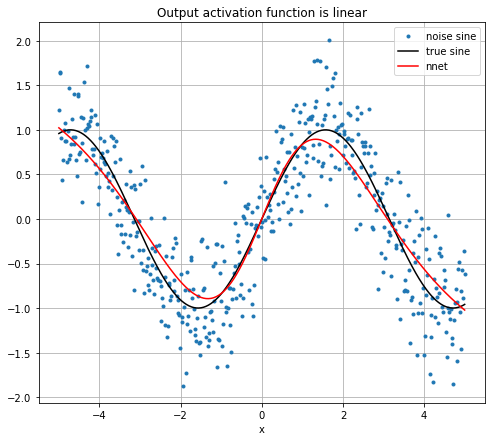

In [9]:
pred  = score(X) 
plt.figure(figsize=(8,7))
plt.plot(X,Y,'.', label='noise sine')
plt.plot(X,ytrue,'-k', label='true sine')
plt.plot(X,pred,'-r', label='nnet')
plt.grid()
plt.xlabel('x')
plt.legend(loc='upper right')  
plt.title('Output activation function is linear')
plt.show()

# More general layer class

In [4]:
"""
Simple MLP with different activation function and error cost 
function.
"""
import numpy as np

class layer:
    def __init__(self, activ, n_nodes, n_inputs):
        self.n_nodes  = n_nodes
        self.n_inputs = n_inputs
        self.activ    = activ
        self.acfunc, self.deriv_out = self.__generate_funcs() 
        self.w = 2*np.random.random([n_nodes, n_inputs])-1
        if not activ in ['linear','sigmoid','tanh']:
            print("Allowed activation function : linear,sigmoid,tanh")                                       
    
    def feed(self,x):
        return  self.acfunc(np.dot(self.w,x.reshape(-1,1)))
    
    def feedData(self,X):
        d = np.dot(X,self.w.T)
        return self.acfunc(d)
    
    def __generate_funcs(self):
        if self.activ=='linear':
            def tmp(x):return x   
            def tmp1p(y):return 1.0       
        elif self.activ=='sigmoid':
            def tmp(x): return 1.0/(1.0+np.exp(-x))
            def tmp1p(y): return y*(1-y)                        
        elif self.activ=='tanh':
            def tmp(x): return np.tanh(x)
            def tmp1p(y): return (1-y*y)            
        else: pass
        return tmp, tmp1p        
    

class output_layer(layer):
    def __init__(self, cost, activ, n_nodes, n_inputs):
        layer.__init__(self,activ, n_nodes, n_inputs)
        self.costType = cost
        if not cost in ['sse','entropy']:
            print("Allowed activation function : 'sse','entropy'") 
        #  costFunc is the error function (y-f)^2 for instance
        #  costFuncDeriv is derivative of the cost function w.r.t f 
        #  for example 2(y-f)(-1)
        #  y is the target and f is the predicted value
        self.costFunc, self.costFuncDeriv = self.__costFunction()            
            
    def __costFunction(self):
        if self.costType=='sse':
            def tmp(y,f):return (y-f)**2
            def tmp1p(y,f) : return 2*(f-y)
        elif self.costType=='entropy':
            def tmp(y,f): return -(y*np.log(f)+(1-y)*np.log(1-f)) 
            def tmp1p(y,f): return -(y/f - (1-y)/(1-f))      
        else: pass
        return tmp, tmp1p
 
    def score(self,x, prevLayer):
        # default is one hidden layer
        # NNET with 2 layers (1 hidden) 
        o1 = prevLayer.feedData(x)
        o2 = self.feedData(o1)
        return o2
    
    def score2(self,x, Layer2,Layer1 ):
        # NNET with 3 layers (2 hidden) 
        o1 = L1.feedData(x)
        o2 = L2.feedData(o1)
        o3 = self.feedData(o2)
        return o3

#--------------------------------------------------------------------------

x = np.linspace(-5,5,500).reshape(-1,1)
n,m = x.shape
ytrue = np.sin(x) 

y = ytrue + 0.4*np.random.randn(n,m)

            
X=Xtr = x.copy()
Y=Ytr = y.copy()

    
n_nodes = 30             
in_dim = Xtr.shape[1]

np.random.seed(3148)     
L1    = layer('tanh',n_nodes ,in_dim)
L2    = output_layer('sse','tanh',1, n_nodes)

eta = 0.001

iters, sErr = 2000, np.Infinity
TrEnt       = []
TeEnt       = []
for i in range(iters):   
    for obs in range(Xtr.shape[0]):
        o0 , y = X[obs,:], float(Ytr[obs])
        o1 = L1.feed(o0)
        o2 = float(L2.feed(o1))
 
        dCost_do2 = L2.costFuncDeriv(y,o2)
        
        delta2 = dCost_do2*L2.deriv_out(o2)
        L2.w  += -eta*delta2*o1.reshape(1,-1)
            
        delta1 = delta2*L1.deriv_out(o1)    
        L1.w += -eta*delta1*o0
    
    _tr = L2.costFunc(Ytr,L2.score(Xtr,L1))

    train_err = float(sum(_tr)/len(_tr))    
    sErr0     = sErr    
    sErr      = train_err    
    if (sErr-sErr0)/sErr0>1e-6: 
       break    
    print("epoch  ",i," Training =", round(train_err,4) )
    TrEnt.append(train_err)    
    #TeEnt.append(test_err)    



epoch   0  Training = 1.0495
epoch   1  Training = 0.9347
epoch   2  Training = 0.8367
epoch   3  Training = 0.7542
epoch   4  Training = 0.6852
epoch   5  Training = 0.6275
epoch   6  Training = 0.5791
epoch   7  Training = 0.5383
epoch   8  Training = 0.5038
epoch   9  Training = 0.4743
epoch   10  Training = 0.449
epoch   11  Training = 0.4272
epoch   12  Training = 0.4082
epoch   13  Training = 0.3915
epoch   14  Training = 0.3768
epoch   15  Training = 0.3638
epoch   16  Training = 0.3523
epoch   17  Training = 0.3419
epoch   18  Training = 0.3326
epoch   19  Training = 0.3242
epoch   20  Training = 0.3166
epoch   21  Training = 0.3096
epoch   22  Training = 0.3033
epoch   23  Training = 0.2975
epoch   24  Training = 0.2922
epoch   25  Training = 0.2874
epoch   26  Training = 0.2829
epoch   27  Training = 0.2787
epoch   28  Training = 0.2749
epoch   29  Training = 0.2713
epoch   30  Training = 0.268
epoch   31  Training = 0.2649
epoch   32  Training = 0.2621
epoch   33  Training =

epoch   272  Training = 0.1882
epoch   273  Training = 0.1881
epoch   274  Training = 0.188
epoch   275  Training = 0.1879
epoch   276  Training = 0.1878
epoch   277  Training = 0.1877
epoch   278  Training = 0.1876
epoch   279  Training = 0.1875
epoch   280  Training = 0.1874
epoch   281  Training = 0.1873
epoch   282  Training = 0.1872
epoch   283  Training = 0.1872
epoch   284  Training = 0.1871
epoch   285  Training = 0.187
epoch   286  Training = 0.1869
epoch   287  Training = 0.1868
epoch   288  Training = 0.1867
epoch   289  Training = 0.1866
epoch   290  Training = 0.1865
epoch   291  Training = 0.1864
epoch   292  Training = 0.1864
epoch   293  Training = 0.1863
epoch   294  Training = 0.1862
epoch   295  Training = 0.1861
epoch   296  Training = 0.186
epoch   297  Training = 0.1859
epoch   298  Training = 0.1859
epoch   299  Training = 0.1858
epoch   300  Training = 0.1857
epoch   301  Training = 0.1856
epoch   302  Training = 0.1856
epoch   303  Training = 0.1855
epoch   304

epoch   580  Training = 0.1711
epoch   581  Training = 0.1711
epoch   582  Training = 0.1711
epoch   583  Training = 0.171
epoch   584  Training = 0.171
epoch   585  Training = 0.171
epoch   586  Training = 0.1709
epoch   587  Training = 0.1709
epoch   588  Training = 0.1709
epoch   589  Training = 0.1709
epoch   590  Training = 0.1708
epoch   591  Training = 0.1708
epoch   592  Training = 0.1708
epoch   593  Training = 0.1707
epoch   594  Training = 0.1707
epoch   595  Training = 0.1707
epoch   596  Training = 0.1706
epoch   597  Training = 0.1706
epoch   598  Training = 0.1706
epoch   599  Training = 0.1705
epoch   600  Training = 0.1705
epoch   601  Training = 0.1705
epoch   602  Training = 0.1704
epoch   603  Training = 0.1704
epoch   604  Training = 0.1704
epoch   605  Training = 0.1704
epoch   606  Training = 0.1703
epoch   607  Training = 0.1703
epoch   608  Training = 0.1703
epoch   609  Training = 0.1702
epoch   610  Training = 0.1702
epoch   611  Training = 0.1702
epoch   612

epoch   862  Training = 0.1664
epoch   863  Training = 0.1664
epoch   864  Training = 0.1664
epoch   865  Training = 0.1664
epoch   866  Training = 0.1664
epoch   867  Training = 0.1664
epoch   868  Training = 0.1664
epoch   869  Training = 0.1664
epoch   870  Training = 0.1663
epoch   871  Training = 0.1663
epoch   872  Training = 0.1663
epoch   873  Training = 0.1663
epoch   874  Training = 0.1663
epoch   875  Training = 0.1663
epoch   876  Training = 0.1663
epoch   877  Training = 0.1663
epoch   878  Training = 0.1663
epoch   879  Training = 0.1663
epoch   880  Training = 0.1663
epoch   881  Training = 0.1663
epoch   882  Training = 0.1663
epoch   883  Training = 0.1663
epoch   884  Training = 0.1663
epoch   885  Training = 0.1663
epoch   886  Training = 0.1663
epoch   887  Training = 0.1663
epoch   888  Training = 0.1663
epoch   889  Training = 0.1662
epoch   890  Training = 0.1662
epoch   891  Training = 0.1662
epoch   892  Training = 0.1662
epoch   893  Training = 0.1662
epoch   

epoch   1220  Training = 0.1658
epoch   1221  Training = 0.1658
epoch   1222  Training = 0.1658


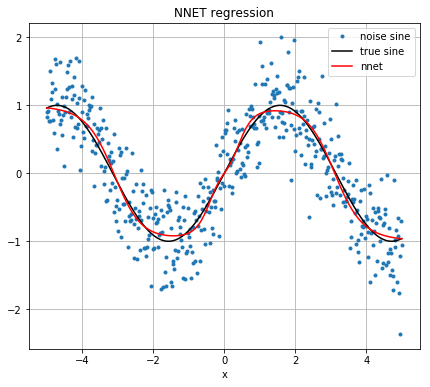

In [5]:
import  matplotlib.pyplot as plt


pred  = L2.score(Xtr,L1) 
plt.figure(figsize=(7,6))
plt.plot(X,Y,'.', label='noise sine')
plt.plot(X,ytrue,'-k', label='true sine')
plt.plot(X,pred,'-r', label='nnet')
plt.grid()
plt.xlabel('x')
plt.legend(loc='upper right')  
plt.title('NNET regression')
plt.show()  

# Problematic case, need for bias
We see below that the prediction goes through 0. bias term might be the answer.

epoch   0  Validation error = 353.3187
epoch   1  Validation error = 323.7766
epoch   2  Validation error = 299.9374
epoch   3  Validation error = 284.6424
epoch   4  Validation error = 276.553
epoch   5  Validation error = 272.6344
epoch   6  Validation error = 270.8284
epoch   7  Validation error = 270.146
epoch   8  Validation error = 270.1534
epoch   9  Validation error = 270.6419
epoch   10  Validation error = 271.4698
epoch   11  Validation error = 272.4954
epoch   12  Validation error = 273.5607
epoch   13  Validation error = 274.5029
epoch   14  Validation error = 275.1781
epoch   15  Validation error = 275.483
epoch   16  Validation error = 275.3662
epoch   17  Validation error = 274.8245
epoch   18  Validation error = 273.8883
epoch   19  Validation error = 272.604
epoch   20  Validation error = 271.0177
epoch   21  Validation error = 269.1667
epoch   22  Validation error = 267.0768
epoch   23  Validation error = 264.7658
epoch   24  Validation error = 262.2482
epoch   25  Va

epoch   225  Validation error = 142.3638
epoch   226  Validation error = 142.3458
epoch   227  Validation error = 142.3279
epoch   228  Validation error = 142.3102
epoch   229  Validation error = 142.2926
epoch   230  Validation error = 142.2752
epoch   231  Validation error = 142.2578
epoch   232  Validation error = 142.2406
epoch   233  Validation error = 142.2236
epoch   234  Validation error = 142.2067
epoch   235  Validation error = 142.1899
epoch   236  Validation error = 142.1732
epoch   237  Validation error = 142.1567
epoch   238  Validation error = 142.1404
epoch   239  Validation error = 142.1241
epoch   240  Validation error = 142.108
epoch   241  Validation error = 142.0921
epoch   242  Validation error = 142.0762
epoch   243  Validation error = 142.0605
epoch   244  Validation error = 142.045
epoch   245  Validation error = 142.0295
epoch   246  Validation error = 142.0142
epoch   247  Validation error = 141.999
epoch   248  Validation error = 141.984
epoch   249  Validat

epoch   435  Validation error = 140.4844
epoch   436  Validation error = 140.48
epoch   437  Validation error = 140.4756
epoch   438  Validation error = 140.4712
epoch   439  Validation error = 140.4668
epoch   440  Validation error = 140.4625
epoch   441  Validation error = 140.4582
epoch   442  Validation error = 140.4539
epoch   443  Validation error = 140.4496
epoch   444  Validation error = 140.4453
epoch   445  Validation error = 140.4411
epoch   446  Validation error = 140.4368
epoch   447  Validation error = 140.4326
epoch   448  Validation error = 140.4284
epoch   449  Validation error = 140.4242
epoch   450  Validation error = 140.42
epoch   451  Validation error = 140.4159
epoch   452  Validation error = 140.4117
epoch   453  Validation error = 140.4076
epoch   454  Validation error = 140.4035
epoch   455  Validation error = 140.3994
epoch   456  Validation error = 140.3953
epoch   457  Validation error = 140.3913
epoch   458  Validation error = 140.3872
epoch   459  Validat

epoch   641  Validation error = 139.8247
epoch   642  Validation error = 139.8223
epoch   643  Validation error = 139.82
epoch   644  Validation error = 139.8176
epoch   645  Validation error = 139.8152
epoch   646  Validation error = 139.8129
epoch   647  Validation error = 139.8105
epoch   648  Validation error = 139.8082
epoch   649  Validation error = 139.8059
epoch   650  Validation error = 139.8035
epoch   651  Validation error = 139.8012
epoch   652  Validation error = 139.7989
epoch   653  Validation error = 139.7966
epoch   654  Validation error = 139.7943
epoch   655  Validation error = 139.792
epoch   656  Validation error = 139.7897
epoch   657  Validation error = 139.7874
epoch   658  Validation error = 139.7851
epoch   659  Validation error = 139.7828
epoch   660  Validation error = 139.7806
epoch   661  Validation error = 139.7783
epoch   662  Validation error = 139.776
epoch   663  Validation error = 139.7738
epoch   664  Validation error = 139.7715
epoch   665  Validat

epoch   848  Validation error = 139.4355
epoch   849  Validation error = 139.4341
epoch   850  Validation error = 139.4326
epoch   851  Validation error = 139.4312
epoch   852  Validation error = 139.4297
epoch   853  Validation error = 139.4283
epoch   854  Validation error = 139.4268
epoch   855  Validation error = 139.4254
epoch   856  Validation error = 139.4239
epoch   857  Validation error = 139.4225
epoch   858  Validation error = 139.4211
epoch   859  Validation error = 139.4196
epoch   860  Validation error = 139.4182
epoch   861  Validation error = 139.4168
epoch   862  Validation error = 139.4154
epoch   863  Validation error = 139.414
epoch   864  Validation error = 139.4125
epoch   865  Validation error = 139.4111
epoch   866  Validation error = 139.4097
epoch   867  Validation error = 139.4083
epoch   868  Validation error = 139.4069
epoch   869  Validation error = 139.4055
epoch   870  Validation error = 139.4042
epoch   871  Validation error = 139.4028
epoch   872  Vali

epoch   1049  Validation error = 139.2011
epoch   1050  Validation error = 139.2001
epoch   1051  Validation error = 139.1992
epoch   1052  Validation error = 139.1983
epoch   1053  Validation error = 139.1974
epoch   1054  Validation error = 139.1965
epoch   1055  Validation error = 139.1956
epoch   1056  Validation error = 139.1947
epoch   1057  Validation error = 139.1938
epoch   1058  Validation error = 139.1929
epoch   1059  Validation error = 139.1921
epoch   1060  Validation error = 139.1912
epoch   1061  Validation error = 139.1903
epoch   1062  Validation error = 139.1894
epoch   1063  Validation error = 139.1885
epoch   1064  Validation error = 139.1876
epoch   1065  Validation error = 139.1868
epoch   1066  Validation error = 139.1859
epoch   1067  Validation error = 139.185
epoch   1068  Validation error = 139.1841
epoch   1069  Validation error = 139.1833
epoch   1070  Validation error = 139.1824
epoch   1071  Validation error = 139.1815
epoch   1072  Validation error = 13

epoch   1249  Validation error = 139.0565
epoch   1250  Validation error = 139.056
epoch   1251  Validation error = 139.0554
epoch   1252  Validation error = 139.0549
epoch   1253  Validation error = 139.0543
epoch   1254  Validation error = 139.0537
epoch   1255  Validation error = 139.0532
epoch   1256  Validation error = 139.0526
epoch   1257  Validation error = 139.0521
epoch   1258  Validation error = 139.0515
epoch   1259  Validation error = 139.051
epoch   1260  Validation error = 139.0505
epoch   1261  Validation error = 139.0499
epoch   1262  Validation error = 139.0494
epoch   1263  Validation error = 139.0488
epoch   1264  Validation error = 139.0483
epoch   1265  Validation error = 139.0477
epoch   1266  Validation error = 139.0472
epoch   1267  Validation error = 139.0467
epoch   1268  Validation error = 139.0461
epoch   1269  Validation error = 139.0456
epoch   1270  Validation error = 139.0451
epoch   1271  Validation error = 139.0445
epoch   1272  Validation error = 139

epoch   1469  Validation error = 138.9622
epoch   1470  Validation error = 138.9619
epoch   1471  Validation error = 138.9616
epoch   1472  Validation error = 138.9613
epoch   1473  Validation error = 138.961
epoch   1474  Validation error = 138.9607
epoch   1475  Validation error = 138.9604
epoch   1476  Validation error = 138.9601
epoch   1477  Validation error = 138.9597
epoch   1478  Validation error = 138.9594
epoch   1479  Validation error = 138.9591
epoch   1480  Validation error = 138.9588
epoch   1481  Validation error = 138.9585
epoch   1482  Validation error = 138.9582
epoch   1483  Validation error = 138.9579
epoch   1484  Validation error = 138.9576
epoch   1485  Validation error = 138.9573
epoch   1486  Validation error = 138.957
epoch   1487  Validation error = 138.9567
epoch   1488  Validation error = 138.9564
epoch   1489  Validation error = 138.9561
epoch   1490  Validation error = 138.9558
epoch   1491  Validation error = 138.9555
epoch   1492  Validation error = 138

epoch   1680  Validation error = 138.9125
epoch   1681  Validation error = 138.9123
epoch   1682  Validation error = 138.9121
epoch   1683  Validation error = 138.912
epoch   1684  Validation error = 138.9118
epoch   1685  Validation error = 138.9116
epoch   1686  Validation error = 138.9115
epoch   1687  Validation error = 138.9113
epoch   1688  Validation error = 138.9111
epoch   1689  Validation error = 138.911
epoch   1690  Validation error = 138.9108
epoch   1691  Validation error = 138.9107
epoch   1692  Validation error = 138.9105
epoch   1693  Validation error = 138.9103
epoch   1694  Validation error = 138.9102
epoch   1695  Validation error = 138.91
epoch   1696  Validation error = 138.9099
epoch   1697  Validation error = 138.9097
epoch   1698  Validation error = 138.9096
epoch   1699  Validation error = 138.9094
epoch   1700  Validation error = 138.9092
epoch   1701  Validation error = 138.9091
epoch   1702  Validation error = 138.9089
epoch   1703  Validation error = 138.9

epoch   1896  Validation error = 138.8883
epoch   1897  Validation error = 138.8883
epoch   1898  Validation error = 138.8882
epoch   1899  Validation error = 138.8881
epoch   1900  Validation error = 138.8881
epoch   1901  Validation error = 138.888
epoch   1902  Validation error = 138.8879
epoch   1903  Validation error = 138.8879
epoch   1904  Validation error = 138.8878
epoch   1905  Validation error = 138.8878
epoch   1906  Validation error = 138.8877
epoch   1907  Validation error = 138.8876
epoch   1908  Validation error = 138.8876
epoch   1909  Validation error = 138.8875
epoch   1910  Validation error = 138.8875
epoch   1911  Validation error = 138.8874
epoch   1912  Validation error = 138.8873
epoch   1913  Validation error = 138.8873
epoch   1914  Validation error = 138.8872
epoch   1915  Validation error = 138.8872
epoch   1916  Validation error = 138.8871
epoch   1917  Validation error = 138.8871
epoch   1918  Validation error = 138.887
epoch   1919  Validation error = 138

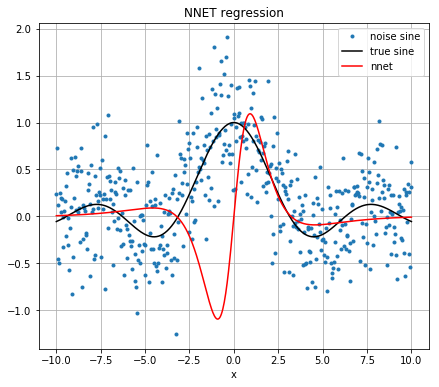

In [2]:
import numpy as np

class layer:
    def __init__(self, activ, n_nodes, n_inputs):
        self.n_nodes  = n_nodes
        self.n_inputs = n_inputs
        self.activ    = activ
        self.acfunc, self.deriv_out = self.__generate_funcs() 
        self.w = 2*np.random.random([n_nodes, n_inputs])-1
        if not activ in ['linear','sigmoid','tanh']:
            print("Allowed activation function : linear,sigmoid,tanh")                                       
    
    def feed(self,x):
        return  self.acfunc(np.dot(self.w,x.reshape(-1,1)))
    
    def feedData(self,X):
        d = np.dot(X,self.w.T)
        return self.acfunc(d)
    
    def __generate_funcs(self):
        if self.activ=='linear':
            def tmp(x):return x   
            def tmp1p(y):return 1.0       
        elif self.activ=='sigmoid':
            def tmp(x): return 1.0/(1.0+np.exp(-x))
            def tmp1p(y): return y*(1-y)                        
        elif self.activ=='tanh':
            def tmp(x): return np.tanh(x)
            def tmp1p(y): return (1-y*y)          

        else: pass
        return tmp, tmp1p     



X   = np.linspace(-10,10,500).reshape(-1,1)
n,m = X.shape
ytrue = np.sin(X)/X

Y = ytrue + 0.4*np.random.randn(n,m)

            

n_te = int(n*0.5) 
import random   

te_ind = random.sample(list(range(n)),n_te)
tr_ind = list(set(list(range(n)))-set(te_ind))

Xte, Yte = X[te_ind,:], Y[te_ind]
Xtr, Ytr = X[tr_ind,:], Y[tr_ind]

def score(x):
    o1 = L1.feedData(x)
    o2 = L2.feedData(o1)    
    return o2

     
      
in_dim = Xte.shape[1]


np.random.seed(197)
n_nodes = 100    
L1      = layer('tanh',n_nodes ,in_dim)
L2      = layer('linear',1 ,n_nodes)

eta = 0.001
iters, sErr = 2000, np.Infinity
for i in range(iters):   
    for obs in range(Xtr.shape[0]):
        o0 , y = Xtr[obs,:], float(Ytr[obs])
        o1 = L1.feed(o0)
        o2 = float(L2.feed(o1))
 
        dCost_do2 = 2*(o2-y)
        
        delta2 = dCost_do2*L2.deriv_out(o2)
        L2.w  += -eta*delta2*o1.reshape(1,-1)
            
        delta1 = delta2*L1.deriv_out(o1)    
        L1.w += -eta*delta1*o0    
    
    resid = Yte - score(Xte)
    valid_err = float(sum(resid**2))    
    sErr0     = sErr    
    sErr      = valid_err    
    if sErr>sErr0 and i>20: #(sErr-sErr0)/sErr0>1e-6: 
       break    
    print("epoch  ",i," Validation error =", round(valid_err,4) )
     
 
import  matplotlib.pyplot as plt

pred  = score(X) 
plt.figure(figsize=(7,6))
plt.plot(X,Y,'.', label='noise sine')
plt.plot(X,ytrue,'-k', label='true sine')
plt.plot(X,pred,'-r', label='nnet')
plt.grid()
plt.xlabel('x')
plt.legend(loc='upper right')  
plt.title('NNET regression')
plt.show()

